In [117]:
import pandas as pd
import numpy as np

In [195]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import xgboost
import catboost
from catboost import CatBoostClassifier

In [196]:
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

In [119]:
df = pd.read_csv('Train_Dataset.csv')
df

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df.drop('EmployeeID',axis=1,inplace=True)

In [121]:
df.isnull().sum()

Attrition             2630
Age                   2946
TravelProfile         2630
Department            2754
HomeToWork            2885
EducationField        2630
Gender                2676
HourlnWeek            2917
Involvement           2630
WorkLifeBalance       2630
Designation           2668
JobSatisfaction       2630
ESOPs                 2630
NumCompaniesWorked    2630
OverTime              2630
SalaryHikelastYear    2799
WorkExperience        2817
LastPromotion         2700
CurrentProfile        2941
MaritalStatus         2630
MonthlyIncome         2723
dtype: int64

In [122]:
df['HourlnWeek'].fillna(df['HourlnWeek'].mean(),inplace=True)
df['HomeToWork'].fillna(df['HomeToWork'].mean(),inplace=True)
df['Involvement'].fillna(df['Involvement'].mean(),inplace=True)
df['WorkLifeBalance'].fillna(df['WorkLifeBalance'].mean(),inplace=True)
df['JobSatisfaction'].fillna(df['JobSatisfaction'].mean(),inplace=True)
df['ESOPs'].fillna(df['ESOPs'].mean(),inplace=True)
df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].mean(),inplace=True)
df['OverTime'].fillna(df['OverTime'].mean(),inplace=True)

df['Age'].fillna(df['Age'].mean(),inplace=True)
df['HomeToWork'].fillna(df['HomeToWork'].mean(),inplace=True)
df['HourlnWeek'].fillna(df['HourlnWeek'].mean(),inplace=True)
df['SalaryHikelastYear'].fillna(df['SalaryHikelastYear'].mean(),inplace=True)
df['WorkExperience'].fillna(df['WorkExperience'].mean(),inplace=True)
df['LastPromotion'].fillna(df['LastPromotion'].mean(),inplace=True)
df['CurrentProfile'].fillna(df['CurrentProfile'].mean(),inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(),inplace=True)

df['Department'].fillna(df['Department'].value_counts().index[0],inplace=True)
df['Gender'].fillna(df['Gender'].value_counts().index[0],inplace=True)
df['Designation'].fillna(df['Designation'].value_counts().index[0],inplace=True)
df['TravelProfile'].fillna(df['TravelProfile'].value_counts().index[0],inplace=True)
df['EducationField'].fillna(df['EducationField'].value_counts().index[0],inplace=True)
df['MaritalStatus'].fillna(df['MaritalStatus'].value_counts().index[0],inplace=True)


In [123]:
df.isnull().sum()

Attrition             2630
Age                      0
TravelProfile            0
Department               0
HomeToWork               0
EducationField           0
Gender                   0
HourlnWeek               0
Involvement              0
WorkLifeBalance          0
Designation              0
JobSatisfaction          0
ESOPs                    0
NumCompaniesWorked       0
OverTime                 0
SalaryHikelastYear       0
WorkExperience           0
LastPromotion            0
CurrentProfile           0
MaritalStatus            0
MonthlyIncome            0
dtype: int64

In [124]:
df.dropna(inplace=True)
df

,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,0.0,35.000000,Rarely,Analytics,5.000000,CA,Male,69.0,1.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,4.385295,M,18932.0
1,1.0,32.000000,Yes,Sales,5.000000,Statistics,Female,62.0,4.0,3.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,4.385295,Single,18785.0
2,0.0,31.000000,Rarely,Analytics,5.000000,Statistics,F,45.0,5.0,3.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.000000,Single,22091.0
3,0.0,34.000000,Yes,Sales,10.000000,Statistics,Female,32.0,3.0,2.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.000000,Divorsed,20302.0
4,0.0,37.000000,No,Analytics,27.000000,Statistics,Female,49.0,3.0,4.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.000000,Divorsed,21674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,0.0,36.000000,Rarely,Analytics,13.000000,CA,F,53.0,3.0,3.0,...,3.0,0.0,4.0,1.0,22.0,11.0,1.0,5.000000,Single,22142.0
5176,0.0,37.108553,Rarely,Marketing,9.000000,CA,Female,66.0,1.0,4.0,...,4.0,1.0,9.0,0.0,23.0,8.0,0.0,2.000000,Single,17109.0
5177,0.0,29.000000,Rarely,Analytics,11.107411,CA,Female,62.0,4.0,2.0,...,1.0,1.0,6.0,0.0,19.0,8.0,0.0,3.000000,M,17532.0
5178,0.0,26.000000,Rarely,Marketing,26.000000,Statistics,Female,61.0,3.0,4.0,...,3.0,0.0,1.0,0.0,28.0,8.0,5.0,7.000000,Divorsed,17942.0


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5180 entries, 0 to 5179
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Attrition           5180 non-null   float64
 1   Age                 5180 non-null   float64
 2   TravelProfile       5180 non-null   object 
 3   Department          5180 non-null   object 
 4   HomeToWork          5180 non-null   float64
 5   EducationField      5180 non-null   object 
 6   Gender              5180 non-null   object 
 7   HourlnWeek          5180 non-null   float64
 8   Involvement         5180 non-null   float64
 9   WorkLifeBalance     5180 non-null   float64
 10  Designation         5180 non-null   object 
 11  JobSatisfaction     5180 non-null   float64
 12  ESOPs               5180 non-null   float64
 13  NumCompaniesWorked  5180 non-null   float64
 14  OverTime            5180 non-null   float64
 15  SalaryHikelastYear  5180 non-null   float64
 16  WorkEx

In [126]:
df = pd.get_dummies(df,drop_first=True)
X = df.drop('Attrition', axis=1)

y = df['Attrition']

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10, random_state=1, stratify=y)

In [181]:
clf = LGBMClassifier(random_state=1)
rf=clf.fit(X_train,y_train)

In [182]:
rf.score(X_train,y_train)

0.9984984984984985

In [183]:
rf.score(X_test,y_test)

0.9845559845559846

In [184]:
clf = XGBClassifier(random_state=1)
rf=clf.fit(X_train,y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:02:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [185]:
rf.score(X_train,y_train)

1.0

In [186]:
rf.score(X_test,y_test)

0.9864864864864865

In [187]:
clf = CatBoostClassifier(random_state=1,learning_rate=0.37)    #  learning_rate=0.36 and 0.38 give the same result
rf=clf.fit(X_train,y_train)

0:	learn: 0.5661626	total: 12.3ms	remaining: 12.3s
1:	learn: 0.4911718	total: 21.2ms	remaining: 10.6s
2:	learn: 0.4370287	total: 29.5ms	remaining: 9.8s
3:	learn: 0.4020790	total: 37.4ms	remaining: 9.32s
4:	learn: 0.3847458	total: 41.7ms	remaining: 8.3s
5:	learn: 0.3657621	total: 45.1ms	remaining: 7.48s
6:	learn: 0.3504838	total: 48.6ms	remaining: 6.89s
7:	learn: 0.3382643	total: 52ms	remaining: 6.44s
8:	learn: 0.3198927	total: 55.3ms	remaining: 6.09s
9:	learn: 0.3102711	total: 58.8ms	remaining: 5.82s
10:	learn: 0.2987035	total: 62.2ms	remaining: 5.59s
11:	learn: 0.2868341	total: 65.6ms	remaining: 5.4s
12:	learn: 0.2740034	total: 69.1ms	remaining: 5.24s
13:	learn: 0.2630187	total: 72.6ms	remaining: 5.11s
14:	learn: 0.2526135	total: 76ms	remaining: 4.99s
15:	learn: 0.2462732	total: 79.5ms	remaining: 4.89s
16:	learn: 0.2391472	total: 82.9ms	remaining: 4.8s
17:	learn: 0.2336421	total: 86.3ms	remaining: 4.71s
18:	learn: 0.2197478	total: 89.8ms	remaining: 4.64s
19:	learn: 0.2115353	total: 93

209:	learn: 0.0049507	total: 750ms	remaining: 2.82s
210:	learn: 0.0049267	total: 754ms	remaining: 2.82s
211:	learn: 0.0048572	total: 757ms	remaining: 2.81s
212:	learn: 0.0048104	total: 761ms	remaining: 2.81s
213:	learn: 0.0047530	total: 764ms	remaining: 2.81s
214:	learn: 0.0047188	total: 768ms	remaining: 2.8s
215:	learn: 0.0046758	total: 772ms	remaining: 2.8s
216:	learn: 0.0046136	total: 775ms	remaining: 2.8s
217:	learn: 0.0046135	total: 778ms	remaining: 2.79s
218:	learn: 0.0045742	total: 782ms	remaining: 2.79s
219:	learn: 0.0044866	total: 785ms	remaining: 2.78s
220:	learn: 0.0044265	total: 789ms	remaining: 2.78s
221:	learn: 0.0043818	total: 792ms	remaining: 2.78s
222:	learn: 0.0043810	total: 795ms	remaining: 2.77s
223:	learn: 0.0043810	total: 798ms	remaining: 2.76s
224:	learn: 0.0043530	total: 801ms	remaining: 2.76s
225:	learn: 0.0043180	total: 805ms	remaining: 2.75s
226:	learn: 0.0043180	total: 807ms	remaining: 2.75s
227:	learn: 0.0043180	total: 810ms	remaining: 2.74s
228:	learn: 0.0

388:	learn: 0.0031279	total: 1.29s	remaining: 2.03s
389:	learn: 0.0031279	total: 1.29s	remaining: 2.02s
390:	learn: 0.0031279	total: 1.3s	remaining: 2.02s
391:	learn: 0.0031279	total: 1.3s	remaining: 2.02s
392:	learn: 0.0031070	total: 1.3s	remaining: 2.01s
393:	learn: 0.0031069	total: 1.31s	remaining: 2.01s
394:	learn: 0.0031069	total: 1.31s	remaining: 2.01s
395:	learn: 0.0031069	total: 1.31s	remaining: 2s
396:	learn: 0.0031068	total: 1.31s	remaining: 2s
397:	learn: 0.0031068	total: 1.32s	remaining: 1.99s
398:	learn: 0.0031068	total: 1.32s	remaining: 1.99s
399:	learn: 0.0031068	total: 1.32s	remaining: 1.99s
400:	learn: 0.0031068	total: 1.33s	remaining: 1.98s
401:	learn: 0.0031068	total: 1.33s	remaining: 1.98s
402:	learn: 0.0031068	total: 1.33s	remaining: 1.97s
403:	learn: 0.0031067	total: 1.33s	remaining: 1.97s
404:	learn: 0.0030698	total: 1.34s	remaining: 1.97s
405:	learn: 0.0030697	total: 1.34s	remaining: 1.96s
406:	learn: 0.0030696	total: 1.34s	remaining: 1.96s
407:	learn: 0.0030696

582:	learn: 0.0028595	total: 1.84s	remaining: 1.31s
583:	learn: 0.0028595	total: 1.84s	remaining: 1.31s
584:	learn: 0.0028595	total: 1.84s	remaining: 1.31s
585:	learn: 0.0028595	total: 1.84s	remaining: 1.3s
586:	learn: 0.0028594	total: 1.85s	remaining: 1.3s
587:	learn: 0.0028594	total: 1.85s	remaining: 1.3s
588:	learn: 0.0028594	total: 1.85s	remaining: 1.29s
589:	learn: 0.0028594	total: 1.86s	remaining: 1.29s
590:	learn: 0.0028594	total: 1.86s	remaining: 1.29s
591:	learn: 0.0028593	total: 1.86s	remaining: 1.28s
592:	learn: 0.0028593	total: 1.86s	remaining: 1.28s
593:	learn: 0.0028592	total: 1.87s	remaining: 1.28s
594:	learn: 0.0028592	total: 1.87s	remaining: 1.27s
595:	learn: 0.0028592	total: 1.87s	remaining: 1.27s
596:	learn: 0.0028592	total: 1.88s	remaining: 1.27s
597:	learn: 0.0028591	total: 1.88s	remaining: 1.26s
598:	learn: 0.0028591	total: 1.88s	remaining: 1.26s
599:	learn: 0.0028591	total: 1.88s	remaining: 1.26s
600:	learn: 0.0028591	total: 1.89s	remaining: 1.25s
601:	learn: 0.0

778:	learn: 0.0028184	total: 2.38s	remaining: 676ms
779:	learn: 0.0028184	total: 2.38s	remaining: 673ms
780:	learn: 0.0028184	total: 2.39s	remaining: 670ms
781:	learn: 0.0028184	total: 2.39s	remaining: 667ms
782:	learn: 0.0028184	total: 2.39s	remaining: 663ms
783:	learn: 0.0028184	total: 2.4s	remaining: 660ms
784:	learn: 0.0028183	total: 2.4s	remaining: 657ms
785:	learn: 0.0028183	total: 2.4s	remaining: 654ms
786:	learn: 0.0028183	total: 2.4s	remaining: 651ms
787:	learn: 0.0028183	total: 2.41s	remaining: 648ms
788:	learn: 0.0028183	total: 2.41s	remaining: 645ms
789:	learn: 0.0028183	total: 2.41s	remaining: 641ms
790:	learn: 0.0028183	total: 2.42s	remaining: 638ms
791:	learn: 0.0028183	total: 2.42s	remaining: 635ms
792:	learn: 0.0028183	total: 2.42s	remaining: 632ms
793:	learn: 0.0028178	total: 2.42s	remaining: 629ms
794:	learn: 0.0028178	total: 2.43s	remaining: 626ms
795:	learn: 0.0028178	total: 2.43s	remaining: 623ms
796:	learn: 0.0028178	total: 2.43s	remaining: 620ms
797:	learn: 0.00

938:	learn: 0.0026234	total: 2.87s	remaining: 186ms
939:	learn: 0.0026234	total: 2.87s	remaining: 183ms
940:	learn: 0.0026208	total: 2.88s	remaining: 180ms
941:	learn: 0.0026046	total: 2.88s	remaining: 177ms
942:	learn: 0.0026046	total: 2.88s	remaining: 174ms
943:	learn: 0.0026045	total: 2.88s	remaining: 171ms
944:	learn: 0.0026045	total: 2.89s	remaining: 168ms
945:	learn: 0.0026045	total: 2.89s	remaining: 165ms
946:	learn: 0.0026045	total: 2.9s	remaining: 162ms
947:	learn: 0.0026045	total: 2.9s	remaining: 159ms
948:	learn: 0.0026044	total: 2.9s	remaining: 156ms
949:	learn: 0.0026044	total: 2.9s	remaining: 153ms
950:	learn: 0.0026044	total: 2.91s	remaining: 150ms
951:	learn: 0.0026044	total: 2.91s	remaining: 147ms
952:	learn: 0.0026044	total: 2.91s	remaining: 144ms
953:	learn: 0.0026044	total: 2.91s	remaining: 141ms
954:	learn: 0.0026044	total: 2.92s	remaining: 137ms
955:	learn: 0.0026044	total: 2.92s	remaining: 134ms
956:	learn: 0.0026044	total: 2.92s	remaining: 131ms
957:	learn: 0.00

In [188]:
rf.score(X_train,y_train)

1.0

In [189]:
rf.score(X_test,y_test)

0.9942084942084942

In [190]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
rf=clf.fit(X_train,y_train)

In [191]:
rf.score(X_train,y_train)

1.0

In [192]:
rf.score(X_test,y_test)

0.9903474903474904

In [223]:
class ModelOptimizer:
    best_score = None
    opt = None
    
    def __init__(self, model, X_train, y_train, categorical_columns_indices=None, n_fold=3, seed=2405, early_stopping_rounds=30, is_stratified=True, is_shuffle=True):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.categorical_columns_indices = categorical_columns_indices
        self.n_fold = n_fold
        self.seed = seed
        self.early_stopping_rounds = early_stopping_rounds
        self.is_stratified = is_stratified
        self.is_shuffle = is_shuffle
        
        
    def update_model(self, **kwargs):
        for k, v in kwargs.items():
            setattr(self.model, k, v)
            
    def evaluate_model(self):
        pass
    
    def optimize(self, param_space, max_evals=10, n_random_starts=2):
        start_time = time.time()
        
        @use_named_args(param_space)
        def _minimize(**params):
            self.model.set_params(**params)
            return self.evaluate_model()
        
        opt = gp_minimize(_minimize, param_space, n_calls=max_evals, n_random_starts=n_random_starts, random_state=2405, n_jobs=-1)
        best_values = opt.x
        optimal_values = dict(zip([param.name for param in param_space], best_values))
        best_score = opt.fun
        self.best_score = best_score
        self.opt = opt
        
        print('optimal_parameters: {}\noptimal score: {}\noptimization time: {}'.format(optimal_values, best_score, time.time() - start_time))
        print('updating model with optimal values')
        self.update_model(**optimal_values)
        plot_convergence(opt)
        return optimal_values

class XgbOptimizer(ModelOptimizer):
    def evaluate_model(self):
        scores = xgboost.cv(self.model.get_xgb_params(), 
                    xgboost.DMatrix(self.X_train, label=self.y_train),
                    num_boost_round=self.model.n_estimators, 
                    metrics='auc', 
                    nfold=self.n_fold, 
                    stratified=self.is_stratified,
                    shuffle=self.is_shuffle,
                    seed=self.seed,
                    early_stopping_rounds=self.early_stopping_rounds)
        self.scores = scores
        test_scores = scores.iloc[:, 2]
        best_metric = test_scores.max()
        return 1 - best_metric
    
class CatboostOptimizer(ModelOptimizer):
    def evaluate_model(self):
        validation_scores = catboost.cv(
        catboost.Pool(self.X_train, 
                      self.y_train, 
                      cat_features=self.categorical_columns_indices),
                      self.model.get_params(), 
                      nfold=self.n_fold,
                      stratified=self.is_stratified,
                      seed=self.seed,
                      early_stopping_rounds=self.early_stopping_rounds,
                      shuffle=self.is_shuffle,
                      
                      plot=False)
        self.scores = validation_scores
        test_scores = validation_scores.iloc[:, 2]
        best_metric = test_scores.max()
        return 1 - best_metric
    
class LightGBMOptimizer(ModelOptimizer):
    def evaluate_model(self):
        lgb_dataset = lgb.Dataset(self.X_train, 
                                  self.y_train, 
                                  self.categorical_columns_indices)
        eval_hist = lgb.cv(self.model.get_params(), 
                           lgb_dataset,
                           self.model.n_estimators, 
                           nfold=self.n_fold,
                           seed=self.seed, 
                           stratified=self.is_stratified, 
                           shuffle=self.is_shuffle,
                           early_stopping_rounds=self.early_stopping_rounds, 
                           metrics='auc')
        self.scores = eval_hist
        test_scores = eval_hist[list(eval_hist.keys())[0]]
        best_metric = max(test_scores)
        return 1 - best_metric

# XG boost

**Default Params**

In [157]:
default_xgb = xgboost.XGBClassifier(
        objective='binary:logistic',
        n_jobs=-1
    )

default_xgb_optimizer = XgbOptimizer(default_xgb, X_train, y_train)
default_xgb_optimizer.evaluate_model()

0.008652000000000104

**Greedy Parameter Tuning**

optimal_parameters: {'learning_rate': 0.11234678477608741}
optimal score: 0.007975000000000065
optimization time: 126.45691204071045
updating model with optimal values


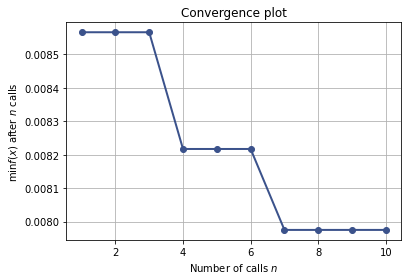

In [161]:
xgb = xgboost.XGBClassifier(
        n_estimators=10000, # use large n_estimators deliberately to make use of the early stopping
        objective='binary:logistic',
        n_jobs=-1
    )

optimizer = XgbOptimizer(xgb, X_train, y_train)
params_space = [Real(0.01, 0.8, name='learning_rate')]
optimal_learning_rate = optimizer.optimize(params_space)

optimal_parameters: {'max_depth': 8, 'min_child_weight': 1}
optimal score: 0.007884666666666651
optimization time: 232.5673930644989
updating model with optimal values


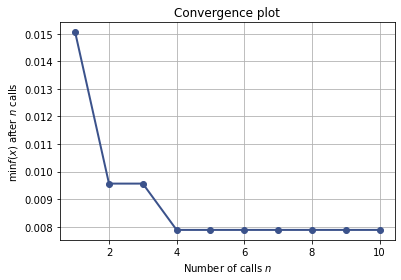

In [162]:
params_space = [
    Integer(2, 10, name='max_depth'), 
    Integer(1, 20, name='min_child_weight')
]
optimal_values = optimizer.optimize(params_space)

In [ ]:
params_space = [
    Real(0.5, 1.0, name='subsample'), 
    Real(0.5, 1.0, name='colsample_bytree')
]
optimal_values = optimizer.optimize(params_space)

In [ ]:
params_space = [
    Real(1.0, 16.0, name='scale_pos_weight'), 
    Real(0.0, 100, name='reg_lambda')
]
optimal_values = optimizer.optimize(params_space)

In [ ]:
optimizer.model

**One Step Optimization**

optimal_parameters: {'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 1, 'subsample': 0.76356916927528, 'colsample_bytree': 1.0, 'scale_pos_weight': 8.315767741006947, 'reg_lambda': 0.0}
optimal score: 0.005914000000000086
optimization time: 2587.3526525497437
updating model with optimal values


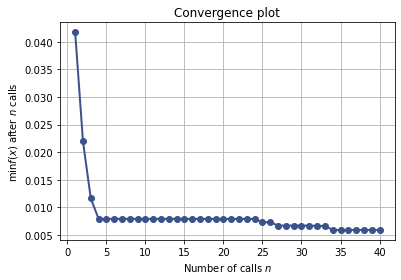

In [163]:
from skopt.space import Real, Integer   # for skopt: pip install scikit-optimize
import time

xgb = xgboost.XGBClassifier(
        n_estimators=10000, # use large n_estimators deliberately to make use of the early stopping
        objective='binary:logistic',
        n_jobs=-1
    )
one_optimizer = XgbOptimizer(xgb, X_train, y_train)
params_space = [Real(0.01, 0.8, name='learning_rate'), 
                Integer(2, 10, name='max_depth'), 
                Integer(1, 20, name='min_child_weight'), 
                Real(0.5, 1.0, name='subsample'), 
                Real(0.5, 1.0, name='colsample_bytree'), 
                Real(1.0, 16.0, name='scale_pos_weight'), 
                Real(0.0, 100, name='reg_lambda')]
one_optimal_values = one_optimizer.optimize(params_space, max_evals=40)

In [164]:
one_optimizer.model

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=1.0, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=0.0,
              scale_pos_weight=8.315767741006947, subsample=0.76356916927528,
              tree_method=None, validate_parameters=None, verbosity=None)

C:\Users\Jitu\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:58:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'XGBoost Feature Importance'}, xlabel='F score', ylabel='Features'>

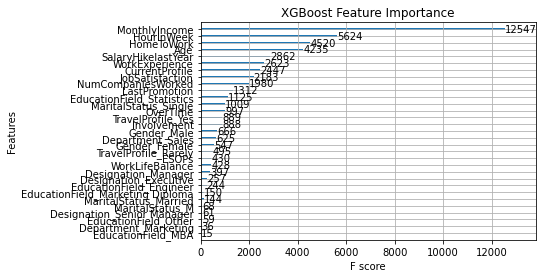

In [165]:
xgb = optimizer.model
xgb.fit(X_train, y_train)
xgboost.plot_importance(xgb, title='XGBoost Feature Importance')

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

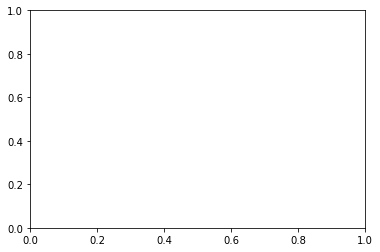

In [166]:
xgboost.plot_tree(xgb)

In [167]:
xgb.score(X_train, y_train)

1.0

In [168]:
xgb.score(X_test, y_test)

0.9884169884169884

# LightGBM

**Default Params**

In [ ]:
default_lgbm = lgb.LGBMClassifier(
        objective='binary',
        n_jobs=-1
    )

default_lgbm_optimizer = LightGBMOptimizer(default_lgbm, X_train, y_train)
default_lgbm_optimizer.evaluate_model()

**Greedy Parameter Tuning**

In [ ]:
greedy_lgbm = lgb.LGBMClassifier(n_estimators=10000, # use large n_estimators deliberately to make use of the early stopping
        objective='binary',
        n_jobs=-1)
greedy_lgbm_optimizer = LightGBMOptimizer(greedy_lgbm, X_train, y_train)
params_space = [Real(0.01, 0.8, name='learning_rate'),]
greedy_lgbm_optimal_values = greedy_lgbm_optimizer.optimize(params_space)

In [ ]:
params_space = [
    Integer(2, 12, name='max_depth'), 
    Integer(1, 20, name='min_child_weight'),
    Integer(10, 50, name='min_child_samples')
]
optimal_values = greedy_lgbm_optimizer.optimize(params_space)

In [ ]:
params_space = [
    Real(0.5, 1.0, name='subsample'), 
    Real(0.5, 1.0, name='colsample_bytree')
]
optimal_values = greedy_lgbm_optimizer.optimize(params_space)

In [ ]:
params_space = [
    Real(1.0, 16.0, name='scale_pos_weight'), 
    Real(0.0, 100, name='reg_lambda')
]
optimal_values = greedy_lgbm_optimizer.optimize(params_space)

In [ ]:
lgbm = lgb.LGBMClassifier(n_estimators=10000, # use large n_estimators deliberately to make use of the early stopping
        objective='binary',
        n_jobs=-1)
lgbm_optimizer = LightGBMOptimizer(lgbm, X_train, y_train)
params_space = [Real(0.01, 0.8, name='learning_rate'), 
                Integer(2, 12, name='max_depth'), 
                Integer(1, 20, name='min_child_weight'),
                Integer(10, 50, name='min_child_samples'),
                Real(0.5, 1.0, name='subsample'), 
                Real(0.5, 1.0, name='colsample_bytree'), 
                Real(1.0, 16.0, name='scale_pos_weight'), 
                Real(0.0, 100, name='reg_lambda')]
lgbm_optimal_values = lgbm_optimizer.optimize(params_space, max_evals=40, n_random_starts=4)

# Catboost

**Default Params**

In [221]:
default_cb = catboost.CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', silent=True)
default_cb_optimizer = CatboostOptimizer(default_cb, X_train, y_train)
default_cb_optimizer.evaluate_model()

Training on fold [0/3]

bestTest = 0.1156779866
bestIteration = 999

Training on fold [1/3]

bestTest = 0.1071317471
bestIteration = 999

Training on fold [2/3]

bestTest = 0.08921976399
bestIteration = 999



0.9864195818069039

**Greedy Parameter Tuning**

In [199]:
cb = catboost.CatBoostClassifier(n_estimators=4000, # use large n_estimators deliberately to make use of the early stopping
                         one_hot_max_size=2,
                         loss_function='Logloss',
                         eval_metric='AUC',
                         boosting_type='Ordered', # use permutations
                         random_seed=2405, 
                         use_best_model=True,
                         silent=True)
cb_optimizer = CatboostOptimizer(cb, X_train, y_train)
params_space = [Real(0.01, 0.8, name='learning_rate'),]
cb_optimal_values = cb_optimizer.optimize(params_space)

TypeError: cv() got an unexpected keyword argument 'metrics'

In [200]:
params_space = [Integer(2, 10, name='max_depth'),]
cb_optimal_values = cb_optimizer.optimize(params_space)

TypeError: cv() got an unexpected keyword argument 'metrics'

In [201]:
params_space = [
                Real(0.5, 1.0, name='colsample_bylevel'), 
                Real(0.0, 100, name='bagging_temperature'),]
cb_optimal_values = cb_optimizer.optimize(params_space)

TypeError: cv() got an unexpected keyword argument 'metrics'

In [202]:
params_space = [
                Real(0.0, 100, name='random_strength'), 
                Real(1.0, 100, name='reg_lambda')]
cb_optimal_values = cb_optimizer.optimize(params_space)

TypeError: cv() got an unexpected keyword argument 'metrics'

In [203]:
params_space = [Real(1.0, 16.0, name='scale_pos_weight'),]
cb_optimal_values = cb_optimizer.optimize(params_space)
Real(1.0, 16.0, name='scale_pos_weight'), 

TypeError: cv() got an unexpected keyword argument 'metrics'

In [204]:
cb_optimizer.model.get_params()

{'loss_function': 'Logloss',
 'random_seed': 2405,
 'use_best_model': True,
 'silent': True,
 'one_hot_max_size': 2,
 'eval_metric': 'AUC',
 'boosting_type': 'Ordered',
 'n_estimators': 4000,
 'learning_rate': 0.11389587749465084,
 'max_depth': 3,
 'colsample_bylevel': 0.5657568844902854,
 'bagging_temperature': 2.468846541831727,
 'random_strength': 13.151376898057068,
 'reg_lambda': 3.4441580764134097,
 'scale_pos_weight': 2.97270653470856}

**One Step Optimization**

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Training on fold [0/3]

bestTest = 0.8991704247
bestIteration = 641

Training on fold [1/3]

bestTest = 0.9039725971
bestIteration = 825

Training on fold [2/3]

bestTest = 0.9293900528
bestIteration = 1147

Training on fold [0/3]

bestTest = 0.9295477622
bestIteration = 191

Training on fold [1/3]

bestTest = 0.95629526
bestIteration = 566

Training on fold [2/3]

bestTest = 0.9632670736
bestIteration = 647

Training on fold [0/3]

bestTest = 0.898788113
bestIteration = 58

Training on fold [1/3]

bestTest = 0.9929373766
bestIteration = 261

Training on fold [2/3]

bestTest = 0.943026229
bestIteration = 77

Training on fold [0/3]

bestTest = 0.8814155399
bestIteration = 111

Training on fold [1/3]

bestTest = 0.88129526
bestIteration = 93

Training on fold [2/3]

bestTest = 0.8667704553
bestIteration = 306

Training on fold [0/3]

bestTest = 0.9381949954
bestIteration = 285

Training on fold [1/3]

bestTest = 0.9524275839
bestIteration = 99

Training on fold [2/3]

bestTest = 0.959256


bestTest = 0.8157105741
bestIteration = 102

optimal_parameters: {'learning_rate': 0.01, 'max_depth': 9, 'colsample_bylevel': 0.9359849899490569, 'scale_pos_weight': 1.5661365621451924, 'bagging_temperature': 35.74247008417978, 'random_strength': 37.225019546916144, 'reg_lambda': 96.67648107743284}
optimal score: 0.8917867568658562
optimization time: 13644.468003749847
updating model with optimal values


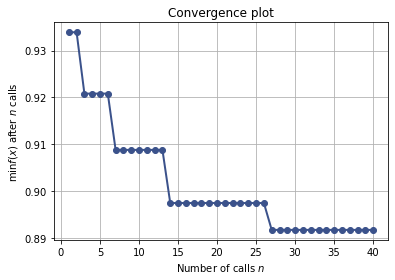

In [224]:
cb = catboost.CatBoostClassifier(n_estimators=4000, # use large n_estimators deliberately to make use of the early stopping
                         one_hot_max_size=2,
                         loss_function='Logloss',
                         eval_metric='AUC',
                         boosting_type='Ordered', # use permutations
                         random_seed=2405, 
                         use_best_model=True,
                         silent=True)
one_cb_optimizer = CatboostOptimizer(cb, X_train, y_train)
params_space = [Real(0.01, 0.8, name='learning_rate'), 
                Integer(2, 10, name='max_depth'), 
                Real(0.5, 1.0, name='colsample_bylevel'), 
                Real(1.0, 16.0, name='scale_pos_weight'), 
                Real(0.0, 100, name='bagging_temperature'), 
                Real(0.0, 100, name='random_strength'), 
                Real(1.0, 100, name='reg_lambda')]
one_cb_optimal_values = one_cb_optimizer.optimize(params_space, max_evals=40, n_random_starts=4)

In [225]:
one_cb_optimizer.model.get_params()

{'loss_function': 'Logloss',
 'random_seed': 2405,
 'use_best_model': True,
 'silent': True,
 'one_hot_max_size': 2,
 'eval_metric': 'AUC',
 'boosting_type': 'Ordered',
 'n_estimators': 4000,
 'learning_rate': 0.010002954785539494,
 'max_depth': 8,
 'colsample_bylevel': 0.778507385393609,
 'scale_pos_weight': 1.5089315906740093,
 'bagging_temperature': 36.66705741430569,
 'random_strength': 41.390187603135885,
 'reg_lambda': 94.02606310882793}

In [228]:
one_cb_optimizer.model

**Model Analysis**

In [ ]:
clf = deepcopy(cb_optimizer.model)
pool = catboost.Pool(X_train, y_train, cat_features=categorical_columns_indices)
clf.set_params(use_best_model=False, reg_lambda=1.0)
clf.fit(pool, use_best_model=False)
feature_importance = clf.get_feature_importance(pool, fstr_type=catboost.EFstrType.FeatureImportance, prettified=True)
interactions = clf.get_feature_importance(pool, fstr_type=catboost.EFstrType.Interaction, prettified=True)
shap_values = clf.get_feature_importance(pool, fstr_type=catboost.EFstrType.ShapValues)

**Feature Importance**

In [ ]:
feature_importance_df = pd.DataFrame(feature_importance, columns=['feature', 'importance'])
feature_importance_df['feature'] = feature_importance_df['feature'].apply(lambda b: b.decode("utf-8"))
feature_importance_df